## Task 3:


## Exploratory Data Analysis Using a Superstore dataset


## Author: Anyanwu Justice


## GRIP: The Sparks Foundation


## Role: Data Science and Business Analytics intern


## Duration: April 2023 - May 2023


In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px
sns.set()

In [2]:
# Loading the data
store= pd.read_csv(r'C:\Users\Ceejay\Downloads\SampleSuperstore.csv')
store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
# Getting to know our data
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The dataset has 9994 rows and 13 columns. All the columns have their correct corresponding data type.

In [4]:
# Checking for missing values
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking for duplicated values
store.duplicated().sum()

17

There are no missing values in the dataset but there are 17 duplicated values. These 17 values will be dropped from the dataset as they will not significantly affect our data


In [6]:
# Dropping duplicated values
store.drop_duplicates(inplace= True)

In [7]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


The 17 values have been dropped successfully and the number of rows in our dataset has reduced to 9977 rows.

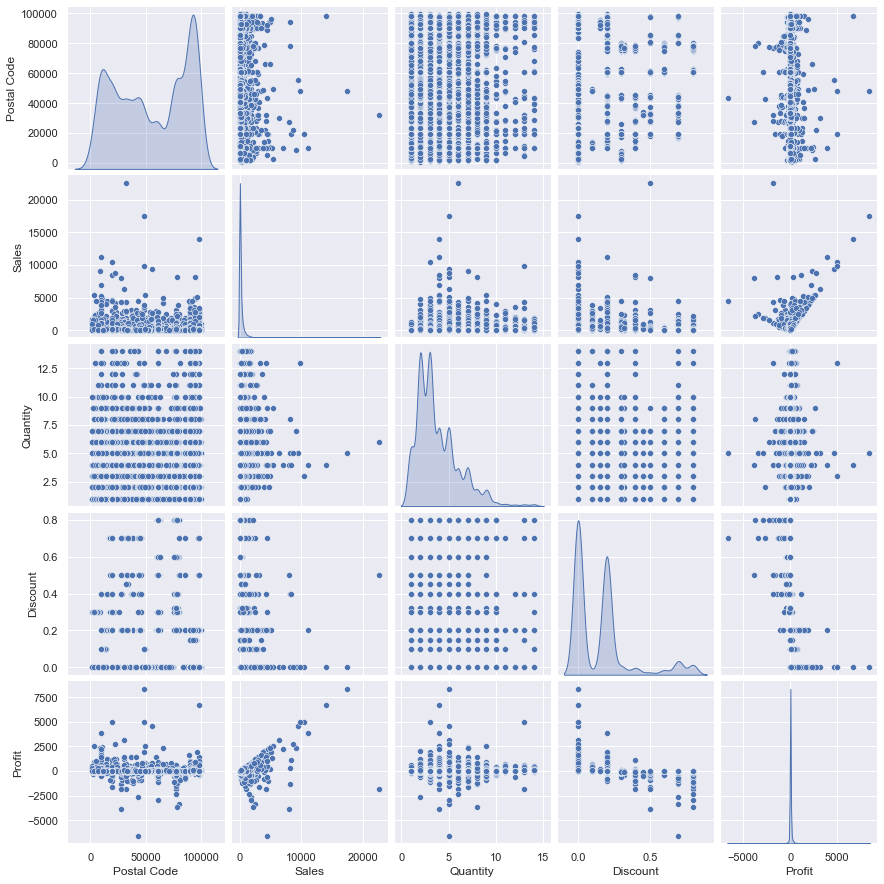

In [8]:
# Plotting a pair plot to visualize our data
sns.pairplot(store, diag_kind= 'kde')

The above figure is a pairplot of the data. The right diagonal represents a distribution plot of the column. 

We can create a column that contains the state code or abbreviation

In [9]:
# A dictionary containig all the states in America and their code
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [10]:
# Creating a column to hold state code
store['code']= store['State'].map(code)

In [11]:
store.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,code
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,KY
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,KY
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,CA
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,FL
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,FL
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,CA
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,CA
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,CA
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,CA
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,CA


# EDA

## 1. What State generate the most sales?

In [12]:
state_sale= store.groupby(['code', 'State'])['Sales'].sum().sort_values(ascending = False).reset_index()
state_sale

,code,State,Sales
0,CA,California,457576.2715
1,NY,New York,310827.1510
2,TX,Texas,170124.5418
3,WA,Washington,138560.8100
4,PA,Pennsylvania,116496.3620
5,FL,Florida,89473.7080
6,IL,Illinois,80162.5370
7,OH,Ohio,77976.7640
8,MI,Michigan,75879.6440
9,VA,Virginia,70636.7200


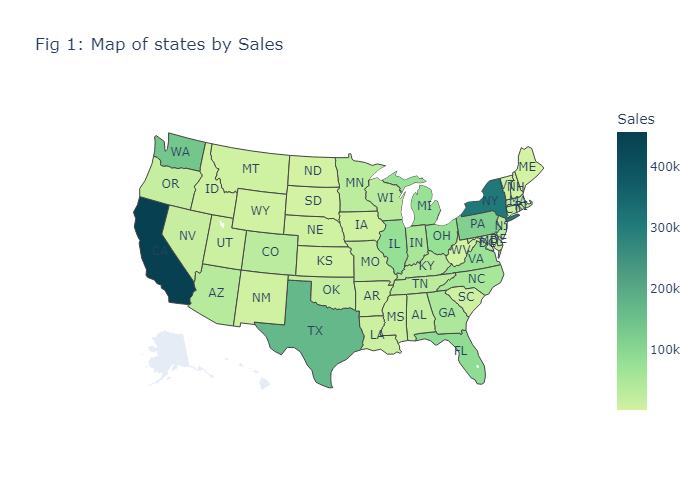

In [14]:

fig1= px.choropleth(state_sale, locations= 'code', \
                    locationmode= 'USA-states', scope= 'usa', color= 'Sales', \
                    color_continuous_scale= 'emrld', hover_name= 'State', \
                   title= ' Fig 1: Map of states by Sales')
fig1.add_scattergeo(locations= state_sale['code'], locationmode= 'USA-states', \
                    text= state_sale['code'], mode= 'text')
fig1.show('png')

The 5 states with the highest number of sales are California, New York, Texas, washington, Pennysylvania. The difference between the sales of the top 5 and least 5 is very large...

# 2. What State generate the most profit?

In [15]:
state_profit= store.groupby(['code', 'State'])['Profit'].sum().sort_values(ascending = False).reset_index()
state_profit

,code,State,Profit
0,CA,California,76330.7891
1,NY,New York,74015.4622
2,WA,Washington,33368.2375
3,MI,Michigan,24428.0903
4,VA,Virginia,18597.9504
5,IN,Indiana,18382.9363
6,GA,Georgia,16250.0433
7,KY,Kentucky,11199.6966
8,MN,Minnesota,10823.1874
9,DE,Delaware,9977.3748


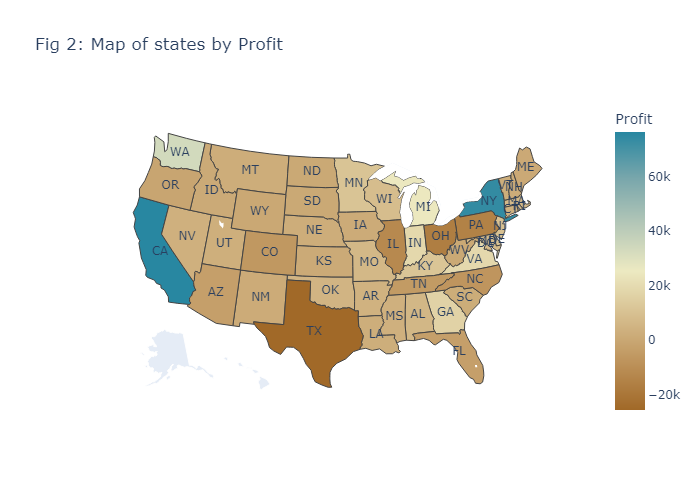

In [16]:
fig2= px.choropleth(state_profit, locations= 'code', \
                    locationmode= 'USA-states', scope= 'usa',\
                    color= 'Profit', color_continuous_scale= 'earth', \
                    hover_name= 'State', title= 'Fig 2: Map of states by Profit')
fig2.add_scattergeo(locations= state_sale['code'], locationmode= 'USA-states', \
                    text= state_sale['code'], mode= 'text')
fig2.show('png')

The top 5 states that generate the most profit are california, New York, Washington, Michigan and Virginia. Sales generating states like Texas, Pennysylvania and Florida are some of the Worst states in terms of profit generation. Lets investigate this.......

In [17]:
# Investigating if the discount rate is the cause of low profit by some of the top sales generating state
state_discount= store.groupby(['code', 'State'])['Discount'].\
mean().sort_values(ascending = False).reset_index()
state_discount

,code,State,Discount
0,IL,Illinois,0.389206
1,TX,Texas,0.370539
2,PA,Pennsylvania,0.328840
3,OH,Ohio,0.325000
4,CO,Colorado,0.316484
5,AZ,Arizona,0.303571
6,FL,Florida,0.299347
7,TN,Tennessee,0.291257
8,OR,Oregon,0.289431
9,NC,North Carolina,0.283534


From the above table, it can be seen that the average discount rate for Pennysylvania, Texas and Florida are higher than other states. This could be the cause for the low profit generation. 

# 3. What State buys the most quantity of goods?

In [18]:
state_demand= store.groupby(['code', 'State'])['Quantity'].sum().sort_values(ascending = False).reset_index()
state_demand

,code,State,Quantity
0,CA,California,7649
1,NY,New York,4220
2,TX,Texas,3718
3,PA,Pennsylvania,2150
4,WA,Washington,1871
5,IL,Illinois,1842
6,OH,Ohio,1757
7,FL,Florida,1379
8,NC,North Carolina,983
9,MI,Michigan,943


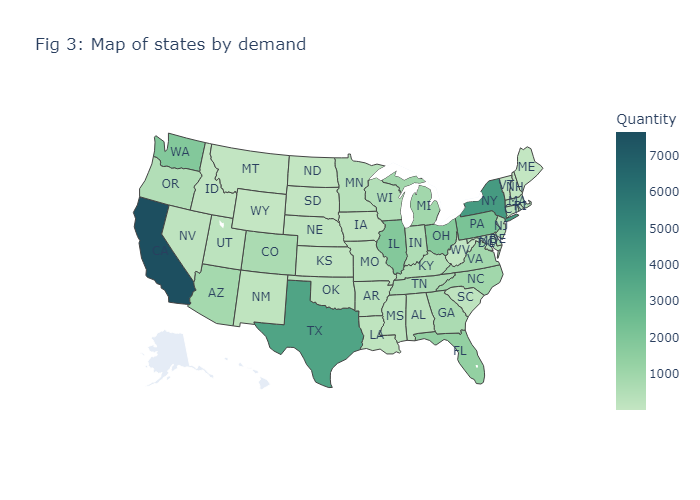

In [19]:
fig3= px.choropleth(state_demand, locations= 'code', \
                    locationmode= 'USA-states', scope= 'usa',\
                    color= 'Quantity', color_continuous_scale= 'blugrn', \
                    hover_name= 'State', title= 'Fig 3: Map of states by demand')
fig3.add_scattergeo(locations= state_sale['code'], locationmode= 'USA-states', \
                    text= state_sale['code'], mode= 'text')
fig3.show('png')

Fig 3 closely resembles fig 1. As is expected, the states that generate the most sales are also the same as the states that buys the most quantity.

## 4. What is the most commonly used Shipping mode?

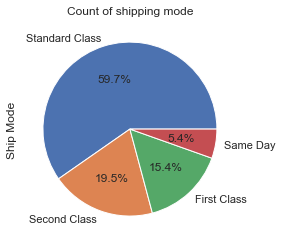

In [20]:
store['Ship Mode'].value_counts().plot(kind= 'pie', autopct= '%1.1f%%')
plt.title('Count of shipping mode')
plt.show()

Most customers prefer to use the standard class shipping mode(59.7%) and 5.4% of customers get their products delivered on the same day. 

## 5. What is the most popular segment?

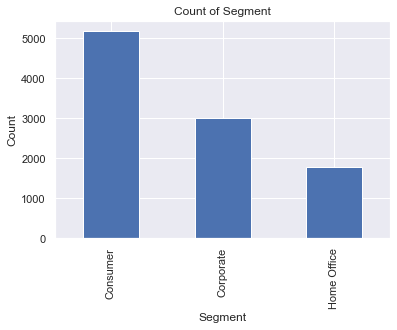

In [21]:
store['Segment'].value_counts().plot(kind= 'bar')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Count of Segment')
plt.show()

Most customers fall under the 'Consumer' segment(51.9%) followed by the corporate segment(over 30.2%) 

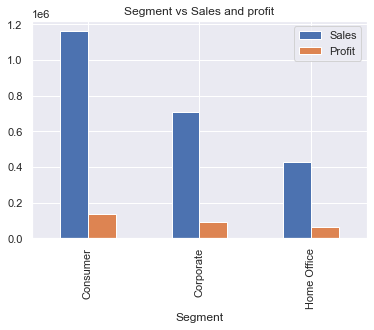

In [22]:
seg_sal= store.groupby('Segment')[['Sales', 'Profit']].sum()
seg_sal.plot(kind= 'bar')
plt.title('Segment vs Sales and profit')
plt.show()

## 6. What category of product generates more sales and Profit?

In [23]:
cat_sal= store.groupby('Category')[['Sales', 'Profit']].sum()
cat_sal

,Sales,Profit
Category,,
Furniture,741306.3133,18421.8137
Office Supplies,718735.2440,122364.6608
Technology,836154.0330,145454.9481


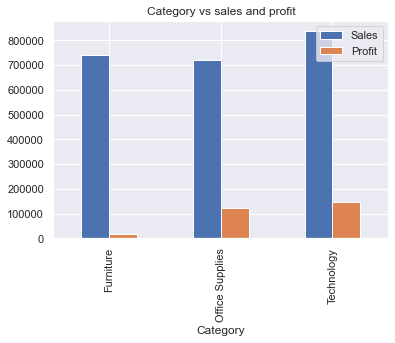

In [24]:
cat_sal.plot(kind= 'bar')
plt.title('Category vs sales and profit')
plt.show()

The technology category of products generates the most sales and profit. Furniture generates the second highest sale but it is the least in terms of profit generation. The office supplies category generate the least sales but it is second highest in terms of profit generation.

## 7. What Region are most of the customers from?

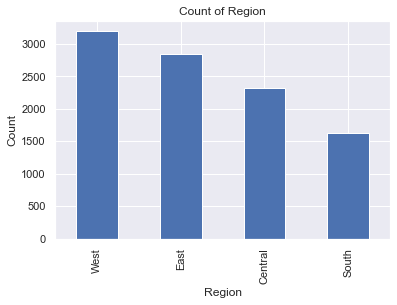

In [25]:
store['Region'].value_counts().plot(kind= 'bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Region')
plt.show()

Most of the customers are concentrated in the western region, closely followed by the eastern region. The southern region has the least amount of customers. 

## 8. What region generates more sales and Profit?


In [26]:
reg_sal= store.groupby('Region')[['Sales', 'Profit']].sum()
reg_sal

,Sales,Profit
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


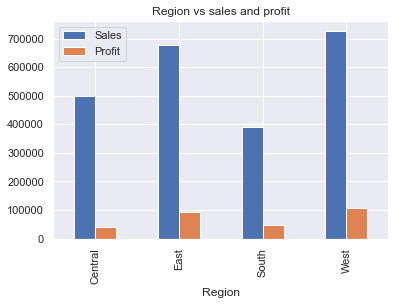

In [27]:
reg_sal.plot(kind= 'bar')
plt.title('Region vs sales and profit')
plt.show()

As to be expected, the western region generates the most sales and profit, followed by the Eastern region.

## 9. Which segment generates the most profit when subdivided into regions?

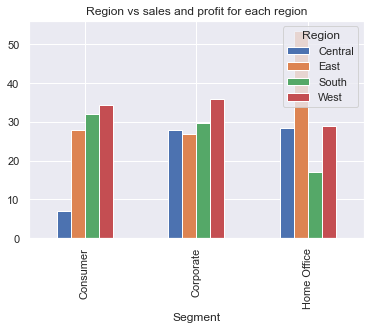

In [28]:
seg_reg= store.pivot_table(index= 'Segment', columns= 'Region', values= 'Profit')
seg_reg.plot(kind= 'bar')
plt.title('Region vs sales and profit for each region')
plt.show()

The 'Home office-East region' segment generates the highest amount of profit followed by the 'corporate-west' and the 'consumer-west'segment.

## 10. What Sub-category of products generates more sales and Profit?

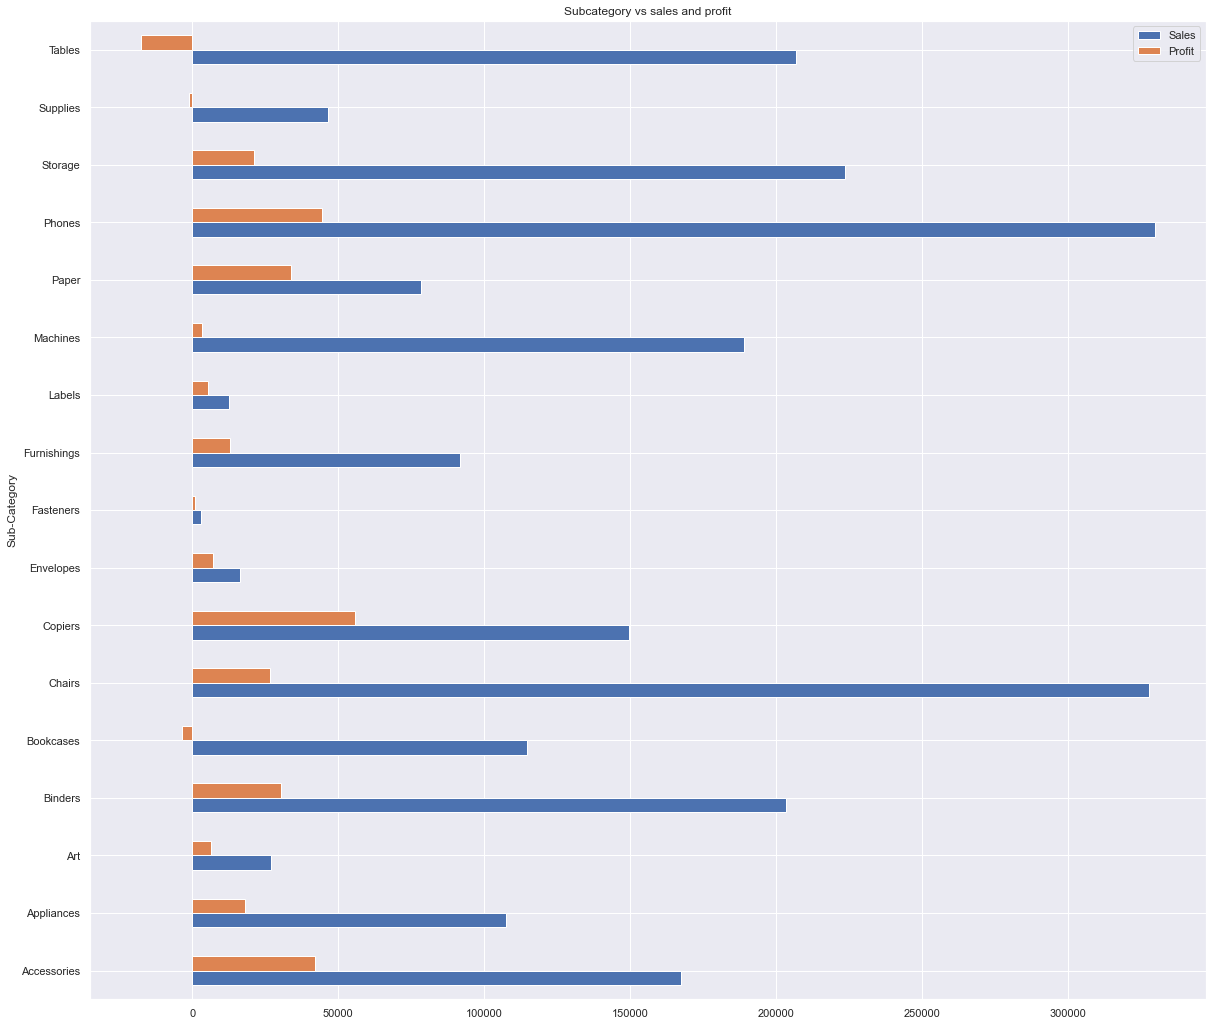

In [29]:
sub_sal= store.groupby('Sub-Category')[['Sales', 'Profit']].sum()
sub_sal.plot(kind= 'barh', figsize= (20, 18))
plt.title('Subcategory vs sales and profit')
plt.show()

The phone category of products, generated the highest number of sales. It is closely followed by the 'Chairs' subcategory. The 'table' subcategory of products despite being one of the top sales generating sub category had a negative profit(loss). The 'bookcases' subcategory also generated net loss. In terms of profit, the 'copiers' subcategory generated the highest amount of profit.

## 11. What Sub-category of products is sold more?

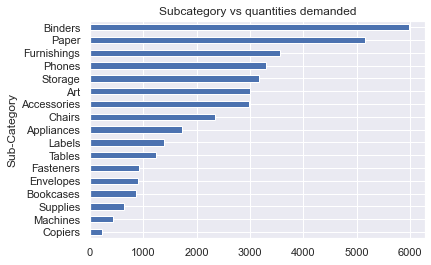

In [30]:
sub_dem= store.groupby('Sub-Category')['Quantity'].sum()\
            .sort_values(ascending= True)
sub_dem.plot(kind= 'barh')
plt.title('Subcategory vs quantities demanded')
plt.show()

The 'binders', 'paper', 'furnishing', 'phones' and 'storage' are the top 5 most bought in terms of quantity demanded.

## Profit Margin

The profit margin represents much profit a business gain from a unit sale. It is usually represented as a percentage. It is a key performance indicator.

In [31]:
profit_margin= store.Profit.sum() / store.Sales.sum()
profit_margin*100

12.465898976950927

The profit margin of the business is 12.46%. This means that $0.12 dollars is gained for dollar of sale generated. This is actually an average profit margin.

Now we can calculate the profit margin per sub category of goods to know how much profit each sub category make per unit sale....

In [32]:
goods_margin= store.groupby('Sub-Category')[['Profit', 'Sales']].sum()
goods_margin['profit margin'] = (goods_margin['Profit'] / goods_margin['Sales']) * 100
goods_margin

,Profit,Sales,profit margin
Sub-Category,,,
Accessories,41936.6357,167380.3180,25.054700
Appliances,18138.0054,107532.1610,16.867517
Art,6524.6118,27107.0320,24.069813
Binders,30228.0003,203409.1690,14.860687
Bookcases,-3472.5560,114879.9963,-3.022768
Chairs,26567.1278,327777.7610,8.105226
Copiers,55617.8249,149528.0300,37.195585
Envelopes,6964.1767,16476.4020,42.267582
Fasteners,949.5182,3024.2800,31.396504


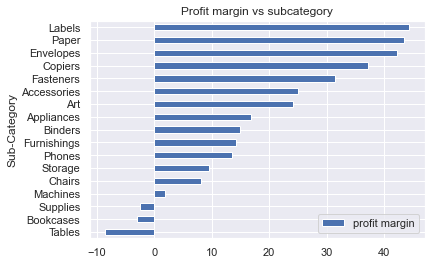

In [33]:
goods_margin[['profit margin']].sort_values('profit margin').plot(kind= 'barh')
plt.title('Profit margin vs subcategory')
plt.show()

The accessories subcategory has the highest profit margin, followed by the Paper and envelope subcategory.

<AxesSubplot:>

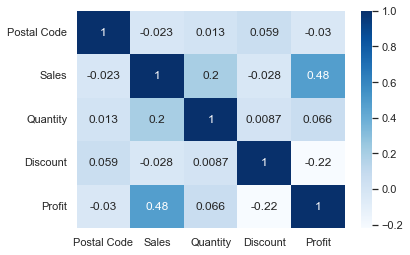

In [34]:
# plotting a correlation matrix
sns.heatmap(store.corr(), annot= True, cmap= 'Blues')

The above figure is a correlation matrix of the dataset. Discount has a very weak linear relatonship with quantities of goods demanded

## Discount Correlation Analytics

In [35]:
temp_data= store.groupby('Category')[['Sales', 'Quantity', 'Profit', 'Discount']].corr()


<AxesSubplot:ylabel='Category-None'>

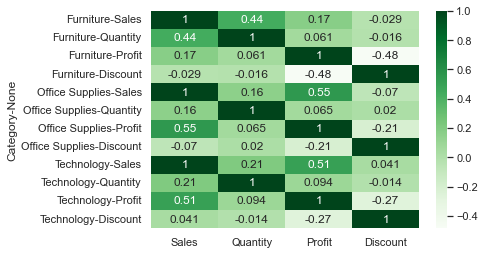

In [36]:
sns.heatmap(temp_data, annot= True, cmap= 'Greens')

From the right side of the matrix above, it is observed that discount has little to no relationship for profit, sales and quantity demanded for each category of products excluding the office-supplies category and the furniture-profit category.

## Transaction Volume and Discount Analysis across all States

In [37]:
# Creating a dataframe to hold the average discount of each states ane their respective transaction volume
# Transaction volume represents number of transactions 
temp= store.groupby('State')[['Sales', 'Discount']].agg({'Sales':'count', 'Discount':'mean'})
temp.rename({'Sales': 'Transaction Volume'}, axis= 1, inplace= True)
temp.sort_values('Discount', ascending= True)

,Transaction Volume,Discount
State,,
Alabama,61,0.000000
Nebraska,38,0.000000
Wisconsin,110,0.000000
Missouri,66,0.000000
Mississippi,53,0.000000
Minnesota,89,0.000000
Maine,8,0.000000
North Dakota,7,0.000000
Kentucky,139,0.000000


## Visualizing this........

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


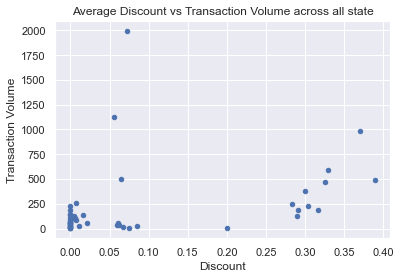

In [38]:
temp.plot(kind= 'scatter', x= 'Discount', y= 'Transaction Volume')
plt.title('Average Discount vs Transaction Volume across all state')
plt.show()

This values looks random. Lets carry out a correlation significance test to see if there is any correlation between the discount and transaction volume for each state.


Before testing the correlation for significance, we have to determine whether both values are normally distributed or not. This will help us to decide whether to use pearson r or spearman r test.An assumption of Pearsonr correlation test is that both variables are normally distributed.




We will use the shapiro wilk's test to determine the data are normally distributed


## Shapiro Wilks test

Alpha = 0.05

Null Hypothesis: Values are normally distributed

Alternate Hypothesis: Values are not normally distributed


In [39]:
import scipy.stats as stats
stats.shapiro(temp['Discount'])

ShapiroResult(statistic=0.6741134524345398, pvalue=3.726862818353993e-09)

In [40]:
stats.shapiro(temp['Transaction Volume'])

ShapiroResult(statistic=0.5610153079032898, pvalue=7.043261113226507e-11)

P value is less than 0.05, so we reject the null hypothesis. The values for both transaction volume and discount are not normally distributed. So we use the spearman r test.

### Spearman r correlation test

Alpha = 0.05


Null Hypothesis: There is no relationship between discount and transaction volume for each state.


Alternate Hypothesis: There is a relationship between discount and transaction volume for each state and it                       is greater than zero.

In [41]:
test= stats.spearmanr(temp['Discount'], temp['Transaction Volume'], alternative= 'greater')
print('Correlation-Coefficient = {}'. format(test[0]))
print('P-value = {}'. format(test[1]))

Correlation-Coefficient = 0.4385421689039502
P-value = 0.0008111208767036502


The correlation coefficient is 0.438 and the pvalue is less than 0.05. So we reject the null hypothesis. This means that there is a significant relationship between the average discount and transaction volume. That is customers from purchasing on higher discounts more discount tends to purchase more.


## Transaction Volume and Discount Analysis across all subcategory

In [42]:
# Transaction volume means number of transactions
temp2= store.groupby('Sub-Category')[['Sales', 'Discount']].agg({'Sales':'count', 'Discount':'mean'})
temp2.rename({'Sales': 'Transaction Volume'}, axis= 1, inplace= True)
temp2.sort_values('Discount', ascending= True)

,Transaction Volume,Discount
Sub-Category,,
Labels,363,0.068871
Storage,846,0.074704
Paper,1359,0.074908
Art,795,0.074969
Supplies,190,0.076842
Accessories,775,0.078452
Envelopes,254,0.080315
Fasteners,217,0.082028
Furnishings,956,0.138494


## Visualizing this........

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


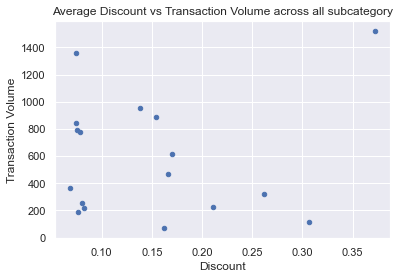

In [43]:
temp2.plot(kind= 'scatter', x= 'Discount', y= 'Transaction Volume')
plt.title('Average Discount vs Transaction Volume across all subcategory')
plt.show()

Lets carry out a correlation test like we did previously.....

## Shapiro Wilks test

Alpha = 0.05

Null Hypothesis: Values are normally distributed

Alternate Hypothesis: Values are not normally distributed


In [44]:
stats.shapiro(temp2['Transaction Volume'])

ShapiroResult(statistic=0.909867525100708, pvalue=0.09952409565448761)

P-value for discount is less than 0.05 from the previous test, so it is not normally distributed. The p-value for  We use the spearman r test. The p-value for transaction volume is greater than 0.05, it is normally distributed. Hence we use the spearman r correlation test.

### Spearman r correlation test

Alpha= 0.05


Null Hypothesis: There is no relationship between discount and transaction volume for each state.


Alternate Hypothesis: There is a relationship between discount and transaction volume for each state and it                       is lesser than zero.

In [45]:
test= stats.spearmanr(temp2['Discount'], temp2['Transaction Volume'], alternative= 'less')
print('Correlation-Coefficient = {}'. format(test[0]))
print('P-value = {}'. format(test[1]))

Correlation-Coefficient = -0.17647058823529413
P-value = 0.24903382866186707


The correlation coefficient is -0.16 and the pvalue is greater than 0.05. So we accept the null hypothesis. This means that there is no significant relationship between the average discount and sales volume across all subcategories.


##  Net Profit and Discount Analysis across all State

In [46]:
temp4= store.groupby('State')[['Profit', 'Discount']].agg({'Profit':'sum', 'Discount':'mean'})
temp4.sort_values('Discount', ascending= True)

,Profit,Discount
State,,
Alabama,5786.8253,0.000000
Nebraska,2037.0942,0.000000
Wisconsin,8401.8004,0.000000
Missouri,6436.2105,0.000000
Mississippi,3172.9762,0.000000
Minnesota,10823.1874,0.000000
Maine,454.4862,0.000000
North Dakota,230.1497,0.000000
Kentucky,11199.6966,0.000000


## Visualizing this.........

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


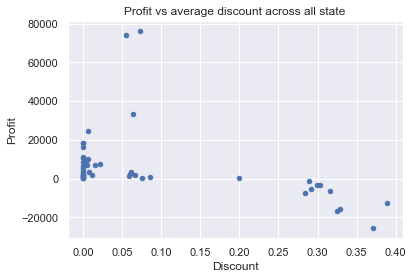

In [47]:
temp4.plot(kind= 'scatter', x= 'Discount', y= 'Profit')
plt.title('Profit vs average discount across all state')
plt.show()

## Shapiro Wilks test to check for normality

Alpha = 0.05

Null Hypothesis: Values are normally distributed

Alternate Hypothesis: Values are not normally distributed

In [48]:
stats.shapiro(temp4['Profit'])

ShapiroResult(statistic=0.7159649729728699, pvalue=2.037345581129557e-08)

From previous tests, P-value for discount is less than 0.05, so it is not normally distributed. The p-value for We use the spearman r test. The p-value for profit is greater than 0.05, it is normally distributed. Hence we use the spearman r correlation test.

## Spearman r correlation test
Alpha = 0.05

Null Hypothesis: There is no relationship between discount and net profit for each state.

Alternate Hypothesis: There is a relationship between discount and net for each state and it is lesser than zero.

In [49]:
test= stats.spearmanr(temp4['Discount'], temp4['Profit'], alternative= 'less')
print('Correlation-Coefficient = {}'. format(test[0]))
print('P-value = {}'. format(test[1]))

Correlation-Coefficient = -0.5193935470333543
P-value = 6.560456284734712e-05


The correlation coefficient is -0.52 and the pvalue is less than 0.05. So we reject the null hypothesis. This means that there is a significant relationship between the average discount and net profit across all states.


## Further Analysis on Discount

In this section, we would check for the overall effect of discount on sales, profit and quantities demanded. First we create a column to tell us if the goods were bought at a discounted price or not.

In [50]:
# Creating a column to signify if goods were bought at a discounted price or not
store['discounted'] = 'no discount'
store.loc[(store.Discount > 0), 'discounted']= 'discount'

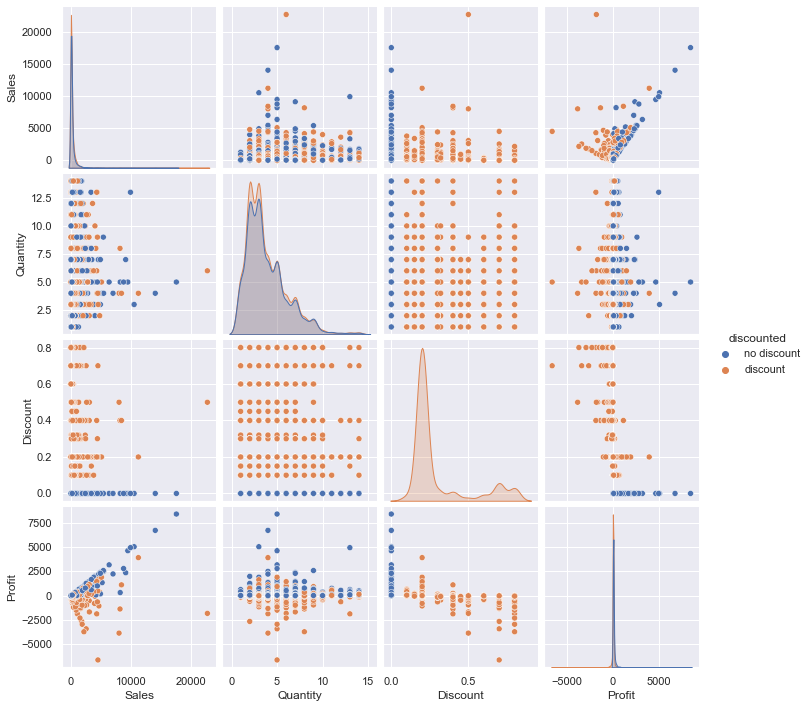

In [51]:
sns.pairplot(store.drop('Postal Code', axis= 1), hue= 'discounted')

Looking at the right horizontal, we can see that the distribution of sales and quantity are almost similar irrespective of the price being discounted or not. This shows that discount really has no effect on all these variables. Lets test this hypothesis using the t-test.

In [52]:
dis= store[store['discounted']=='discount']
no_dis= store[store['discounted']=='no discount']
dis_df= dis[['Profit', 'Sales', 'Quantity']]
no_dis_df= no_dis[['Profit', 'Sales', 'Quantity']]

In [53]:
def pre_significance_test(sig_df1, sig_df2):
    #Conducts a ttest for the pre trial period
    ''' Null hypothesis: There is no significant difference between discounted transactions and non discounted transactions. 
        Alternate hypothesis: There is a significant difference between discounted transactions and non discounted transactions.
        Alpha= 0.05'''
    
    arr= [ ]
    for i in dis_df.columns:
        tab= stats.ttest_ind(sig_df1[i], sig_df2[i])
        arr.append(tab)
    temp_df= pd.DataFrame(arr)
    temp_df.index= dis_df.columns
    return temp_df

In [54]:
pre_significance_test(dis_df, no_dis_df)

,statistic,pvalue
Profit,-15.880610,4.192006e-56
Sales,0.464089,6.425940e-01
Quantity,-0.754432,4.506074e-01


From the above table, we can see that the only the pvalue for Profit between the two groups is less than alpha (0.05). So we accept the alternative hypotheis for the profit column for both groups signifying that there is significant difference between profit for both classes. The p value for the sales and quantity columns is greater than 0.05. This means that there is enough evidence to accept the null hypothesis. 

# Summary of EDA
1.  California, New York, Texas, washington, Pennysylvania are the top 5 highest sales generating states for the business. More attention should be given to customers from these states. Wyoming, South Dakota	Maine, West Virginia and North Dakota generates the least amount of sales.
2.  More attention should also be given to 'customers' in the customer segment as they make up more than 50 percent of the customers base and generates more sales and profit than any other segment.
3.  When the data was segmented or grouped by states, a positive linear correlation (r= 0.44) was found between number of transactions and the average discount. This could be as a result of 'Word-of-Mouth' marketing from customers who previously purchased goods. A negative linear correlation(-0.52) was also found between total net profit and average discount across all states.
4. The cross selling method should be employed where complimentary goods are sold together.
5. High margin subcategory of goods that are also in high demand such as accessories, paper, Art should always be in stock.
6. Goods can be sold together to a particular segment. e.g creating a package for the 'home-office' segment as they may be too busy to walk down to the store to purchase goods.
7. The gross profit margin is 12.46%. This should be monitored and tracked as it is a key performance index.
8. Customers in the west region should be targeted for marketing and promotions.
9. More data should be collected to generate more analysis.
10. In general, the major weak area in this business is the fact that the amount of discounts given does not improve sales significantly although there is a huge customer base for states with higher average discounts since they purchase more often. The major threat is that this frequent discounting can lead to a change in your customers' purchasing behaviour as they may later feel that the goods being purchased are of lower value since it was purchaed cheaper.  

## THANK YOU
